In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Step1: Datasets creation

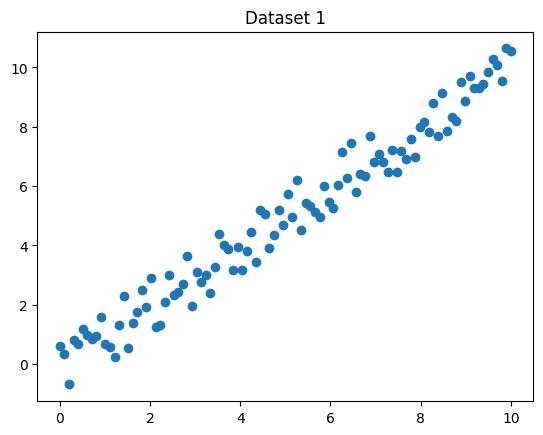

In [2]:
# Dataset 1
xs1 = np.linspace(0, 10, 100)
ys1 = xs1 + np.random.random(100)*2 - 1

plt.scatter(xs1, ys1)
plt.title("Dataset 1")
plt.show()

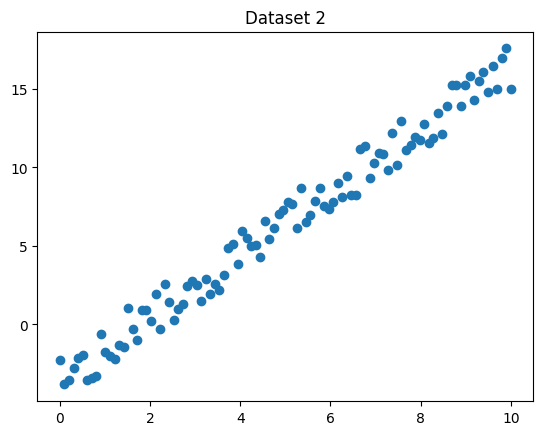

In [3]:
# Dataset 2
xs2 = np.linspace(0, 10, 100)
ys2 = 2*xs2 + np.random.random(100)*3 - 5

plt.scatter(xs2, ys2)
plt.title("Dataset 2")
plt.show()

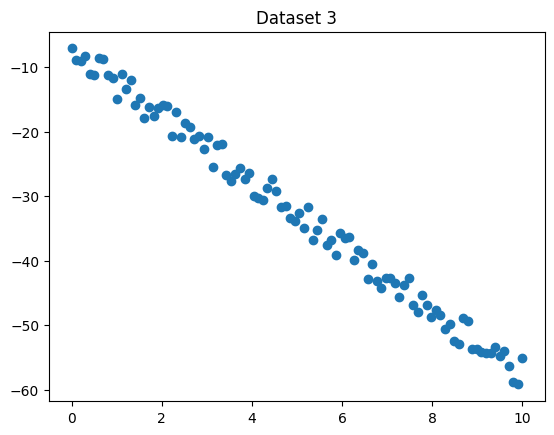

In [5]:
# Dataset 3
xs3 = np.linspace(0, 10, 100)
ys3 = -5*xs3 + np.random.random(100)*5 - 10

plt.scatter(xs3, ys3)
plt.title("Dataset 3")
plt.show()

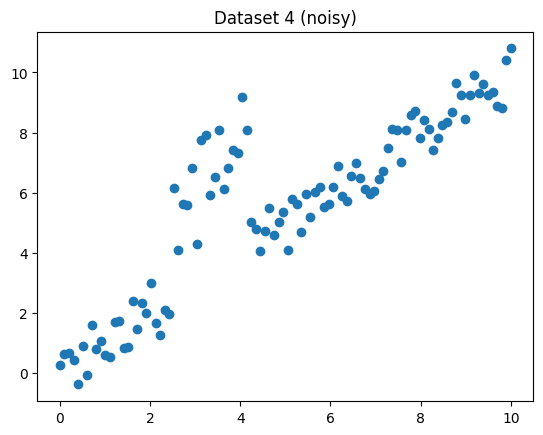

In [8]:
# Dataset 4 (with noise)
xs4 = np.linspace(0, 10, 100)
ys4 = xs4 + np.random.random(100)*2 - 1
ys4[25:42] *= 2

plt.scatter(xs4, ys4)
plt.title("Dataset 4 (noisy)")
plt.show()

### Step 2: Train linear regression on dataset 1

In [9]:
X_train = xs1.reshape(-1, 1)
y_train = ys1

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Step 3: Testing how model works on all 4 datasets

In [11]:
%%writefile tests.py
@pytest.fixture()
def test_model():
    # dataset 1
    y_pred1 = model.predict(xs1.reshape(-1, 1))
    mse1 = mean_squared_error(ys1, y_pred1)
    r2_1 = r2_score(ys1, y_pred1)
    assert mse1 > 0
    assert r2_1 > 0

    # dataset 2
    y_pred2 = model.predict(xs2.reshape(-1, 1))
    mse2 = mean_squared_error(ys2, y_pred2)
    r2_2 = r2_score(ys2, y_pred2)
    assert mse2 > 0
    assert r2_2 > 0

    # dataset 3
    y_pred3 = model.predict(xs3.reshape(-1, 1))
    mse3 = mean_squared_error(ys3, y_pred3)
    r2_3 = r2_score(ys3, y_pred3)
    assert mse3 > 0
    assert r2_3 > 0

    # dataset 4 (noisy)
    y_pred4 = model.predict(xs4.reshape(-1, 1))
    mse4 = mean_squared_error(ys4, y_pred4)
    r2_4 = r2_score(ys4, y_pred4)
    assert mse4 > 0
    assert r2_4 > 0

# Run tests with pytest
if __name__ == '__main__':
    pytest.main(['-v'])

Writing tests.py


### Step 4: Prediction quality analysis

In [14]:
def analyze_predictions_quality(xs, ys, dataset_name):
    y_pred = model.predict(xs.reshape(-1, 1))
    mse = mean_squared_error(ys, y_pred)
    r2 = r2_score(ys, y_pred)
    print(f"Metrics for {dataset_name}:")
    print(f"MSE: {mse}")
    print(f"R-squared: {r2}")
    print()

# Анализ качества предсказания на всех датасетах
analyze_predictions_quality(xs1, ys1, "Dataset 1")
analyze_predictions_quality(xs2, ys2, "Dataset 2")
analyze_predictions_quality(xs3, ys3, "Dataset 3")
analyze_predictions_quality(xs4, ys4, "Dataset 4 (noisy)")

Metrics for Dataset 1:
MSE: 0.3156557641140991
R-squared: 0.9640236943573921

Metrics for Dataset 2:
MSE: 11.881052265100669
R-squared: 0.6650746937607451

Metrics for Dataset 3:
MSE: 1730.5092008302256
R-squared: -6.84394402666499

Metrics for Dataset 4 (noisy):
MSE: 2.413720669476477
R-squared: 0.7187932558087985



### Step 5: Find the problem in the noisy dataset

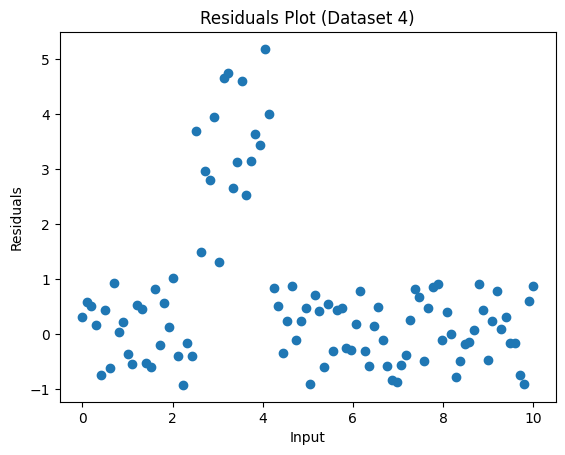

In [13]:
# Analyze model residuals on the dataset 4
y_pred4 = model.predict(xs4.reshape(-1, 1))
residuals = ys4 - y_pred4.flatten()

plt.scatter(xs4, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Dataset 4)")
plt.show()

Judging by the analysis of the residuals of the model, those may indicate a problem in the model or unaccounted factors in the data.